# Simulated Annealing

## 1

In [12]:
import numpy as np
import numpy.random as rnd
import scipy.stats as stats
import math as math
import random as random
import matplotlib.pyplot as plt

In [110]:
n = 10 # Number of cities
x0 = random.sample(range(0,n), n) # Start with a random permutation
# Esnure we always start at city zero
#x0.insert(0,0)
#x0.append(0)

def place_cities_on_unit_circle(n):
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    x_coords = np.zeros(n)
    y_coords = np.zeros(n)
    for i in range(n):
        x_coords[i] = np.sin(angles[i])
        y_coords[i] = np.cos(angles[i])
    x_coords = np.roll(x_coords, -1)
    y_coords = np.roll(y_coords, -1)
    return x_coords, y_coords

def getCityDistances(x_coords, y_coords):
    M = np.zeros((len(x_coords), len(y_coords)))
    for i in range(len(x_coords)):
        for j in range(len(y_coords)):
            if j==i:
                continue
            else:
                dist = np.sqrt((x_coords[i]- x_coords[j])**2 + (y_coords[i] - y_coords[j])**2)
                M[i,j] = dist
    return M

def getCost(x, M):
    cost = M[x[-1], x[0]]
    n = len(x) - 1
    for i in range(0,len(x)-1):
        xi = x[i]
        xip1 = x[i+1]
        cost += M[xi, xip1]
    return cost
def Tk(k):
    return 1 / np.sqrt(1 + k)
    #return -np.log(k + 1)

def RWMH(x0, M, iter = 1000):
    switched = 0
    routes = []
    stuff = []
    routes.append(x0)
    costs = []
    costs.append(getCost(x0, M))
    n = len(x0)
    for l in range(iter):
        current_route = routes[l]
        current_cost = costs[l]
        # Get two random indexes
        i = int(rnd.randint(low = 0, high = n, size = 1))
        j = i
        while i == j:
            j = int(rnd.randint(low = 0, high = n, size = 1))
        new_route = current_route.copy()
        # Switch indices
        new_route[i] = current_route[j]
        new_route[j] = current_route[i]
        new_cost = getCost(new_route, M)

        tk = Tk(iter)
        U = rnd.uniform(size = 1)
        if U <= min(current_cost / new_cost, np.exp(-(new_cost - current_cost) / tk) ):
            costs.append(new_cost)
            routes.append(new_route)
            switched += 1
            stuff.append(np.exp(-(new_cost - current_cost) / tk))
        else:
            costs.append(current_cost)
            routes.append(current_route)
    return costs, routes, switched, stuff

x_coords, y_coords = place_cities_on_unit_circle(n)
M = getCityDistances(x_coords, y_coords)
x_ideal = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]


In [113]:
costs, routes, switch, stuff = RWMH(x0, M, iter = 10000)


In [114]:

print(getCost(routes[-1], M))
#routes[-1] = routes[-3].copy()
#
print(routes[-1])
#plt.hist(costs)

6.180339887498948
[6, 5, 4, 3, 2, 1, 0, 9, 8, 7]


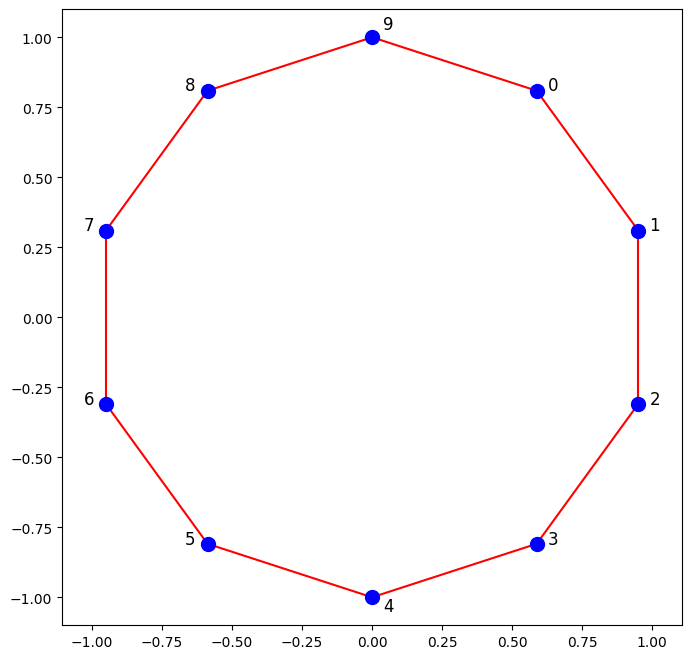

In [127]:
def plotRoute(x0, x_coords, y_coords):
    plt.figure(figsize=(8, 8))
    # Plot the cities as points and annotate them
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        plt.scatter(x, y, color='red')  # Plot the city
        if x < 0:
            xtext = x - 0.08
        else:
            xtext = x + 0.04      
        if y < 0 and x < 0.1 and x > -0.1:
            ytext  = y - 0.05
        elif y > 0 and x < 0.1 and x > -0.1:
            ytext = y + 0.03
        else:
            ytext = y
        plt.text(xtext, ytext, str(i), color='black', fontsize=12)  # Annotate the city with its order
    
    # Plot lines between each city in order
    for i in range(len(x_coords)):
        next_i = (i + 1) % len(x_coords)  # Ensure the last city connects to the first
        plt.plot([x_coords[i], x_coords[next_i]], [y_coords[i], y_coords[next_i]], 'r-')
    
    # Highlight the starting city
    plt.scatter([x_coords[x0]], [y_coords[x0]], color='blue', zorder=5, s=100)  # Highlight the starting point with a larger, blue dot
    plt.axis('equal')  # Equal aspect ratio ensures that 1 unit in x is equal to 1 unit in y
    plt.show()

plotRoute(x0, x_coords, y_coords)